# Data Science and Business Analytics Internship

## Author: Pruthviraj Chavan

## Task: Prediction using supervised ML

### This task is simple linear regression task as it involves only 2 variables (i.e. 1 is dependent variable and another is independent variable)

#### Dataset Available here http://bit.ly/w-data

#### Question: What will be predicted score if a student studies for 9.25 hrs/ day?

### Importing libraries

In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
import warnings

### Importing and reading the data

In [4]:
#Importing the data from url
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
# lets take a look at first 5 records in the dataset
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### <font color = red> Checking for null values

In [8]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### <font color = green> There are no null values in our data

In [9]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Visualizing the data set

#### We will try to find the relationship in our data

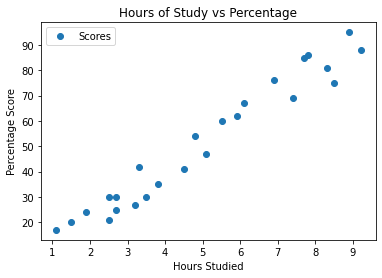

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [10]:
# ploting the distribution of scores
data.plot(x = "Hours", y = "Scores", style = "o")
plt.title("Hours of Study vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()
data.corr()

#### <font color = Teal> From the above scatter plot we can interprete that there is 'Positive Linear' relation between hours studied and percentage score.

In [13]:
warnings.filterwarnings('ignore')

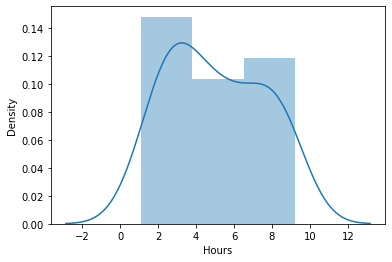

In [15]:
# To check the normality of the data
sns.distplot(data['Hours'])
plt.show()

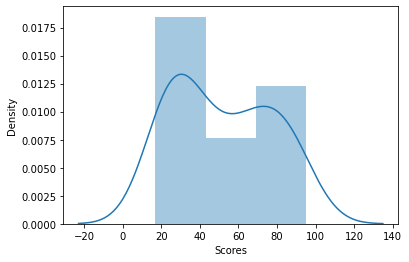

In [16]:
sns.distplot(data['Scores'])
plt.show()

### Preparing the data

#### Divide the data in attributes (inputs) and labels (outputs)

In [17]:
X = data.iloc[:, :-1].values   #attribute
y = data.iloc[:, 1].values     #label

### Now split the data into training and test sets, We will do this by using Scikit-Learn's built in train_test_split() method:

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)  # 80% training & 20% testing

### Training the algorithm

#### We will use Linear Regression which is supervised ML Algorithm

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training Complete.")

Training Complete.


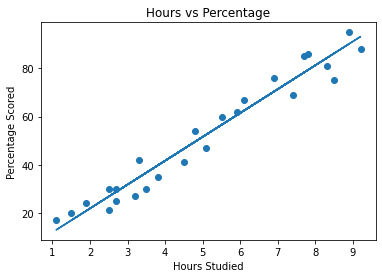

In [22]:
# Ploting the regression line
line = regressor.coef_*X + regressor.intercept_

plt.scatter(X, y)
plt.plot(X, line);
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

### Making Predictions

In [24]:
print(X_test)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [25]:
# Comparing Actual vs Predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### We can check, train and test scores

In [28]:
Train_score = regressor.score(X_train, y_train)
Test_score = regressor.score(X_test, y_test)

print("Train score: {}\nTest score: {}".format(Train_score, Test_score))


Train score: 0.9515510725211552
Test score: 0.9454906892105354


### We can plot Actual vs Predicted scores

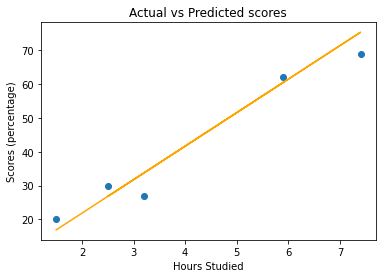

In [32]:
plt.scatter(x = X_test, y = y_test)
plt.plot(X_test, y_pred, color = 'orange')
plt.title('Actual vs Predicted scores')
plt.ylabel('Scores (percentage)')
plt.xlabel('Hours Studied')
plt.show()

### Evaluating the Model

In [33]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982


##### <font color = Teal> Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.
##### <font color = Teal> We can also predict the marks by giving the input of number of hours studied.

#### Example <font color = salmon>:  What will be predicted score if a student studies for 9.25 hrs/ day?

In [36]:
Hours = 9.25
pred_score = regressor.predict([[Hours]])
print("No of Hours = {}".format(Hours))
print("Predicted Score = {}".format(round(pred_score[0],2)))

No of Hours = 9.25
Predicted Score = 93.69


## <font color = Purple> Thank You!!!
